python implementation of [Patchwork](https://mattdesl.svbtle.com/pen-plotter-2)

In [1]:
import penkit
import sklearn
import shapely
import numpy as np
from sklearn.cluster import DBSCAN
from shapely.geometry import Point, MultiPoint, MultiLineString, LineString, MultiPolygon, Polygon

import random

In [3]:
def rand_between(a, b):
    return np.random.uniform(a, b)

def point(margin=2.0, min_x=0.0, min_y=0.0, max_x=WIDTH, max_y=HEIGHT):
    x = rand_between(min_x + margin, max_x - margin)
    y = rand_between(min_y + margin, max_y - margin)
    return Point(x,y)

def point_in_geom(geom):
    (min_x, min_y, max_x, max_y) = geom.bounds
    while True:
        candidate = point(margin=0.0, min_x=min_x, min_y=min_y, max_x=max_x, max_y=max_y)
        if candidate.within(geom):
            return candidate

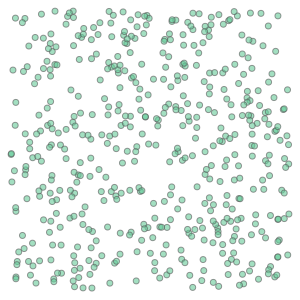

In [5]:
MultiPoint([point() for _ in range(N_POINTS)])

In [4]:
from sklearn.cluster import KMeans
#from sklearn.cluster import AgglomerativeClustering

def patch_geom(geom, classifier, min_points=10, n_points=1000):
    points = [point_in_geom(geom) for _ in range(n_points)]
    
    hulls = [] 
    
    while len(points) > min_points:
        X = np.array([[pt.x,pt.y] for pt in points])
        clusters = classifier.fit_predict(X)

        largest_area = 0
        largest_cluster = 0
        largest_hull = None
        points_to_remove = []
        for c in range(clusters.max()):
            cluster = [points[i] for i in np.where(clusters == c)[0]]
            if not cluster:
                continue
            cluster = MultiPoint(cluster)
            hull = cluster.convex_hull.buffer(1)
            area = hull.area

            if area > largest_area:
                largest_area = area
                largest_cluster = c
                largest_hull = hull
                points_to_remove = np.where(clusters == c)[0]

        hulls.append(largest_hull)
        points = [pt for pt in points if not pt.within(largest_hull)]
    
    return hulls

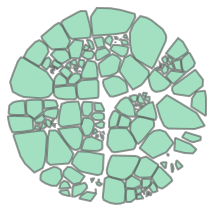

In [16]:
import random

geoms = [Point(.0,.0).buffer(100.0)]
classifier = KMeans(n_clusters=4, init='random', algorithm='elkan')

for _ in range(10):
    geoms.sort(key=lambda x: x.area)
    geom = geoms.pop()
    subgeoms = patch_geom(geom, classifier, n_clusters=4)
    subgeoms_ = MultiPolygon(subgeoms)
    while not subgeoms_.is_valid:
        subgeoms = [g.buffer(-0.1) for g in subgeoms]
        subgeoms_ = MultiPolygon(subgeoms)
    geoms.extend(subgeoms_)

MultiPolygon(geoms)

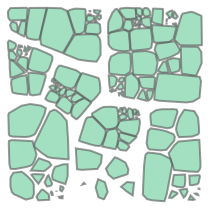

In [18]:
geoms = [Point(.0,.0).buffer(100.0).envelope]
classifier = KMeans(n_clusters=4, init='random', algorithm='elkan')

for _ in range(10):
    geoms.sort(key=lambda x: x.area)
    geom = geoms.pop()
    subgeoms = patch_geom(geom, classifier, n_clusters=4)
    subgeoms_ = MultiPolygon(subgeoms)
    while not subgeoms_.is_valid:
        subgeoms = [g.buffer(-0.1) for g in subgeoms]
        subgeoms_ = MultiPolygon(subgeoms)
    geoms.extend(subgeoms_)

MultiPolygon(geoms)

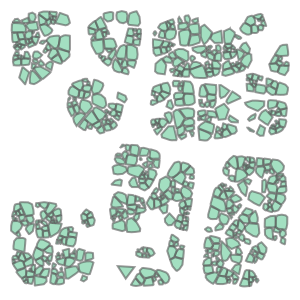

In [5]:
geoms = [Point(.0,.0).buffer(1000.0).envelope]
classifier = KMeans(n_clusters=4, init='random', algorithm='elkan')

for _ in range(100):
    geoms.sort(key=lambda x: x.area)
    geom = geoms.pop()
    subgeoms = patch_geom(geom, classifier, min_points=50, n_points=500)
    subgeoms_ = MultiPolygon(subgeoms)
    while not subgeoms_.is_valid:
        subgeoms = [g.buffer(-0.01) for g in subgeoms]
        subgeoms_ = MultiPolygon(subgeoms)
    geoms.extend(subgeoms_)

geoms_ = MultiPolygon(geoms)
while not geoms_.is_valid:
    geoms = [g.buffer(-0.0001) for g in geoms]
    geoms_ = MultiPolygon(geoms)
MultiPolygon(geoms)

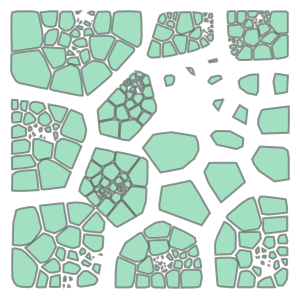

In [9]:
geoms = [Point(.0,.0).buffer(1000.0).envelope]
classifier = KMeans(n_clusters=8, init='random', algorithm='elkan')

for _ in range(10):
    geoms.sort(key=lambda x: x.area)
    geom = geoms.pop()
    subgeoms = patch_geom(geom, classifier, min_points=16, n_points=4000)
    subgeoms_ = MultiPolygon(subgeoms)
    while not subgeoms_.is_valid:
        subgeoms = [g.buffer(-0.01) for g in subgeoms]
        subgeoms_ = MultiPolygon(subgeoms)
    geoms.extend(subgeoms_)

geoms_ = MultiPolygon(geoms)
while not geoms_.is_valid:
    geoms = [g.buffer(-0.0001) for g in geoms]
    geoms_ = MultiPolygon(geoms)
MultiPolygon(geoms)

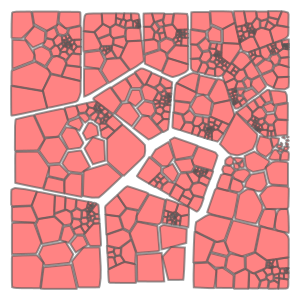

In [18]:
geoms = [Point(.0,.0).buffer(1000.0).envelope]
classifier = KMeans(n_clusters=8, init='random', algorithm='elkan')

for _ in range(16):
    geoms.sort(key=lambda x: x.area)
    geom = geoms.pop()
    subgeoms = patch_geom(geom, classifier, min_points=16, n_points=40000)
    subgeoms_ = MultiPolygon(subgeoms)
    while not subgeoms_.is_valid:
        new_subgeoms = []
        for i,a in enumerate(subgeoms.copy()):
            for j,b in enumerate(subgeoms.copy()):
                if i == j:
                    continue
                if a.intersects(b):
                    a = a.buffer(-0.001)
            new_subgeoms.append(a)
        
#         subgeoms = [g.buffer(-0.01) for g in subgeoms]
        subgeoms = new_subgeoms
        subgeoms_ = MultiPolygon(subgeoms)
    geoms.extend(subgeoms_)

# geoms_ = MultiPolygon(geoms)
# while not geoms_.is_valid:
#     geoms = [g.buffer(-0.0001) for g in geoms]
#     geoms_ = MultiPolygon(geoms)
MultiPolygon(geoms)

In [19]:
with open("patchwork-overlap-4.svg", 'w') as f:
    f.write('<svg>\n\t')
    f.write(MultiPolygon(geoms).svg())
    f.write('</svg>\n')

In [32]:
geoms = [Point(.0,.0).buffer(1000.0).envelope]
classifier = KMeans(n_clusters=8, init='random', algorithm='elkan')

for _ in range(100):
    geoms.sort(key=lambda x: x.area)
    geom = geoms.pop()
    subgeoms = patch_geom(geom, classifier, n_clusters=8, n_points=2000)
    subgeoms_ = MultiPolygon(subgeoms)
    while not subgeoms_.is_valid:
        subgeoms = [g.buffer(-0.01) for g in subgeoms]
        subgeoms_ = MultiPolygon(subgeoms)
    geoms.extend(subgeoms_)

geoms_ = MultiPolygon(geoms)
while not geoms_.is_valid:
    geoms = [g.buffer(-0.0001) for g in geoms]
    geoms_ = MultiPolygon(geoms)
MultiPolygon(geoms)

KeyboardInterrupt: 

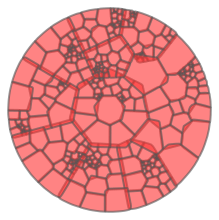

In [34]:
N_POINTS = 10000

import random

geoms = [Point(.0,.0).buffer(100.0)]
classifier = KMeans(n_clusters=8, init='random', algorithm='elkan')

for i in range(10,0,-1):    
    geoms.sort(key=lambda x: x.area)
    geom = geoms.pop()
    geoms.extend(patch_geom(geom, classifier, n_points=N_POINTS*i))

MultiPolygon(geoms)

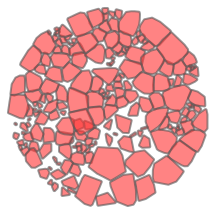

In [35]:
N_POINTS = 100

import random

geoms = [Point(.0,.0).buffer(100.0)]
classifier = KMeans(n_clusters=8, init='random', algorithm='elkan')

for i in range(10,0,-1):    
    geoms.sort(key=lambda x: x.area)
    geom = geoms.pop()
    geoms.extend(patch_geom(geom, classifier, n_points=N_POINTS*i))

MultiPolygon(geoms)

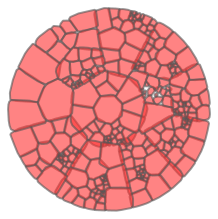

In [39]:
N_POINTS = 1000

import random

geoms = [Point(.0,.0).buffer(100.0)]
classifier = KMeans(n_clusters=8, init='k-means++', algorithm='elkan')

for i in range(10,0,-1):    
    geoms.sort(key=lambda x: x.area)
    geom = geoms.pop()
    geoms.extend(patch_geom(geom, classifier, n_points=N_POINTS*i))

MultiPolygon(geoms)

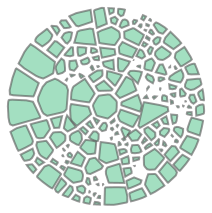

In [51]:
MultiPolygon([g.buffer(-2.71) for g in geoms])

In [52]:
out = MultiPolygon([g.buffer(-2.71) for g in geoms])

with open("patchwork-town-square.svg", 'w') as f:
    f.write('<svg>\n\t')
    f.write(out.svg())
    f.write('</svg>\n')